# SILVER PRICES

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pyodbc
import quandl
import matplotlib.pyplot as plt
import math as math
import os 
%matplotlib inline

In [2]:
#Display options
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)

In [3]:
SilverPrice = quandl.get("LBMA/SILVER", authtoken="jJLD2gkVUNrszRRebz2U",start_date = "2010-01-01")
SilverPrice.tail()


,USD,GBP,EURO
Date,,,
2020-04-14,15.51,12.36,14.17
2020-04-15,15.57,12.45,14.28
2020-04-16,15.50,12.41,14.25
2020-04-17,15.16,12.18,13.99
2020-04-20,15.15,12.15,13.94


In [4]:
#Convert column type to date time
#GoldPrice.index = pd.to_datetime(GoldPrice.index)
#GoldPrice.iloc[:,0] = pd.to_datetime(GoldPrice.iloc[:,0])


SilverPrice = SilverPrice.iloc[: , [0]].copy() 
SilverPrice.dropna(subset = ["USD"], inplace=True)
SilverPrice.tail()



,USD
Date,
2020-04-14,15.51
2020-04-15,15.57
2020-04-16,15.50
2020-04-17,15.16
2020-04-20,15.15


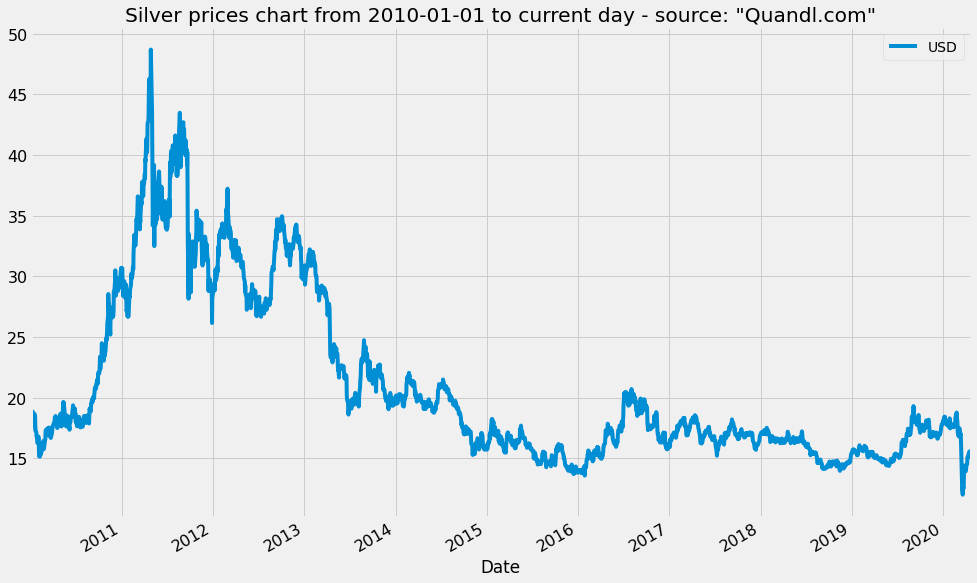

In [5]:
plt.style.use('fivethirtyeight')
SilverPrice.plot(title="Silver prices chart from 2010-01-01 to current day - source: \"Quandl.com\"",
            figsize=(15,10),grid=True,fontsize=16)

# Predictions Silver Prices with Prophet

In [6]:
df = SilverPrice.reset_index()

#Rename columns for prophet library
df = df.rename(columns={'Date': 'ds', 'USD': 'y'})

#Display Data Frame
df.head()

,ds,y
0,2010-01-04,17.17
1,2010-01-05,17.57
2,2010-01-06,17.89
3,2010-01-07,18.09
4,2010-01-08,18.12


In [7]:
#Import Prophet library
from fbprophet import Prophet

#Instantiating a new Prophet object
m = Prophet(daily_seasonality=True)

#Call object's fit method and pass in the historical dataframe
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [8]:
#Extend the "ds" column with forecast
future = m.make_future_dataframe(freq='D',periods=365)
future.tail()

,ds
2962,2021-04-16
2963,2021-04-17
2964,2021-04-18
2965,2021-04-19
2966,2021-04-20


In [ ]:
#Assign predicted values
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

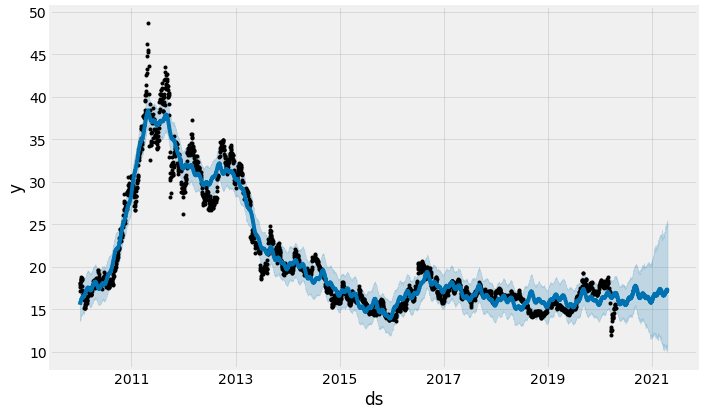

In [10]:
#Show a plot with the forecast
fig1 = m.plot(forecast)

In [ ]:
#Show a plot with components
fig2 = m.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

#Add trendline to plot
fig = plot_plotly(m, forecast,trend=True)

indicator="Silver"

#Update plot title, labels and other display options
fig.update_layout(
    title=(indicator +" price forecast 2021 using Prophet - source: \"Quandl.com\""),
    xaxis_title="Date",
    yaxis_title="Price",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#242151"
    )
)
py.iplot(fig)

In [13]:
#Merge two Data Frames (imported from .csv file and forecast) on date column ('ds')
df2 = df.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],sort=True,on=['ds'],how="outer")

#Rename the columns title
df2 = df2.rename(columns={'ds': 'Date', 'y': 'Index','yhat': 'Forecast',
                          'yhat_lower': 'Forecast_(lower)','yhat_upper': 'Forecast_(upper)'})

#Display header
df2.tail(15)

,Date,Index,Forecast,Forecast_(lower),Forecast_(upper)
2952,2021-04-06,NaN,16.973270,10.270119,24.299049
2953,2021-04-07,NaN,17.008125,10.404570,24.333958
2954,2021-04-08,NaN,17.034814,10.390689,24.565633
2955,2021-04-09,NaN,16.994225,10.152931,24.527355
2956,2021-04-10,NaN,17.207481,10.875617,24.883274
2957,2021-04-11,NaN,17.232713,10.310594,24.778445
2958,2021-04-12,NaN,17.103633,10.487787,25.146811
2959,2021-04-13,NaN,17.160514,10.239496,24.610902
2960,2021-04-14,NaN,17.179664,10.372629,24.973937
2961,2021-04-15,NaN,17.188127,10.447837,24.962571


In [14]:
#Calculation of mean for every column
meanIndex = df2['Index'].mean()
meanForecast = df2['Forecast'].mean()
meanForecastLower = df2['Forecast_(lower)'].mean()
meanForecastUpper = df2['Forecast_(upper)'].mean()

#Dictionary with mean values
meanDict = ({'Index': meanIndex, 'Forecast': meanForecast,
            'Forecast_(Lower)': meanForecastLower, 'Forecast_(Upper)': meanForecastUpper})
#Display mean
print('Mean: ')
meanDict

Mean: 


{'Index': 20.966218293620265,
 'Forecast': 20.41916355659683,
 'Forecast_(Lower)': 18.294564177594665,
 'Forecast_(Upper)': 22.582087519228626}

In [15]:

#Max values
maxIndex = df2['Index'].max()
maxForecast = df2['Forecast'].max()
maxForecastLower = df2['Forecast_(lower)'].max()
maxForecastUpper = df2['Forecast_(upper)'].max()

#Dictionary with max values
maxDict = ({'Index': maxIndex, 'Forecast': maxForecast,
            'Forecast_(Lower)': maxForecastLower, 'Forecast_(Upper)': maxForecastUpper})
#Display max
print('Max value: ')
maxDict

Max value: 


{'Index': 48.7,
 'Forecast': 38.40680232252326,
 'Forecast_(Lower)': 36.449530849703855,
 'Forecast_(Upper)': 40.361280429331}

In [16]:
#Min values
minIndex = df2['Index'].min()
minForecast = df2['Forecast'].min()
minForecastLower = df2['Forecast_(lower)'].min()
minForecastUpper = df2['Forecast_(upper)'].min()

#Dictionary with min values
minDict = ({'Index': minIndex, 'Forecast': minForecast,
            'Forecast_(Lower)': minForecastLower, 'Forecast_(Upper)': minForecastUpper})
#Display mean
print('Min: ')
minDict

Min: 


{'Index': 12.005,
 'Forecast': 13.899346111498453,
 'Forecast_(Lower)': 9.986516162950672,
 'Forecast_(Upper)': 15.857850545179602}

In [17]:
#How many rows is above or below average predicted value
indexAboveMeanForecast = df2["Index"].between(meanForecast,maxIndex)
indexBelowMeanForecast = df2["Index"].between(minIndex,meanForecast)

In [18]:
#Smallest value date
minIndex = df2.nsmallest(n=1,columns='Index')
minIndexValue = minIndex['Index'].loc[minIndex.index]
minIndexDate = minIndex['Date'].loc[minIndex.index].to_string(index=False)

#Largest value date
maxIndex = df2.nlargest(n=1,columns='Index')
maxIndexValue = maxIndex['Index'].loc[maxIndex.index]
maxIndexDate = maxIndex['Date'].loc[maxIndex.index].to_string(index=False)

#Smallest predicted value date
minForecast = df2.nsmallest(n=1,columns='Forecast')
minForecastValue = minForecast['Forecast'].loc[minForecast.index]
minForecastDate = minForecast['Date'].loc[minForecast.index].to_string(index=False)

#Largest predicted value date
maxForecast = df2.nlargest(n=1,columns='Forecast')
maxForecastValue = maxForecast['Forecast'].loc[maxForecast.index]
maxForecastDate = maxForecast['Date'].loc[maxForecast.index].to_string(index=False)
maxForecastDate

'2011-04-28'

# SUMARRY

In [19]:
print('The average index value is %f and the average predicted value is %f .' % (meanIndex, meanForecast))
print('There are %d rows (values) above average predicted value.' % len(df2[indexAboveMeanForecast]))
print('There are %d rows (values) below average predicted value.' % len(df2[indexBelowMeanForecast]))
print('The smallest index value is %f on %s .' % (minIndexValue, minIndexDate))
print('The largest index value is %f on %s .' % (maxIndexValue, maxIndexDate))
print('The smallest predicted value is %f on %s .' % (minForecastValue, minForecastDate))
print('The largest predicted value is %f on %s .' % (maxForecastValue, maxForecastDate))

The average index value is 20.966218 and the average predicted value is 20.419164 .
There are 827 rows (values) above average predicted value.
There are 1775 rows (values) below average predicted value.
The smallest index value is 12.005000 on 2020-03-19 .
The largest index value is 48.700000 on 2011-04-28 .
The smallest predicted value is 13.899346 on 2015-12-21 .
The largest predicted value is 38.406802 on 2011-04-28 .


# Saving DF with predictions to DB

In [20]:
#Destination folder
os.chdir("C:/Users/Lukasz/Documents/GitHub/Analysis-and-forecast-of-stock-exchange-price-based-on-selected-indicators-using-machine-learning/data")

import sqlite3

In [23]:
conn = sqlite3.connect('predictionsLS.db')
c = conn.cursor()

In [22]:
# Creating a table
c.execute('CREATE TABLE '+indicator+' ([Date] date PRIMARY KEY, [Index] float, [Forecast] float, [Forecast_(lower)] float, [Forecast_(upper)] float)')
conn.commit()

OperationalError: table Silver already exists

In [24]:
# Saving data frame to database 
df2.to_sql(indicator, conn, if_exists='replace', index = False)

In [25]:
# Extracing records from database (just for a test)

c.execute('''  
SELECT * FROM '''+indicator+'''
          ''')
for row in c.fetchall():
    print (row)

('2010-01-04 00:00:00', 17.17, 15.52180519638298, 13.696417009740129, 17.4916780846211)
('2010-01-05 00:00:00', 17.57, 15.624929743235043, 13.81990238487927, 17.45332241229095)
('2010-01-06 00:00:00', 17.89, 15.694980219630137, 13.621568277203636, 17.57237941950695)
('2010-01-07 00:00:00', 18.09, 15.758483204580928, 13.875286236577445, 17.77268228832005)
('2010-01-08 00:00:00', 18.12, 15.755946627799897, 13.658921917168186, 17.58471004302145)
('2010-01-11 00:00:00', 18.84, 15.983283781833899, 14.119522396194553, 17.93269666056785)
('2010-01-12 00:00:00', 18.41, 16.079663847701017, 14.230587249050703, 18.15741701525632)
('2010-01-13 00:00:00', 18.35, 16.137994404929334, 14.376789694008048, 18.072969456574913)
('2010-01-14 00:00:00', 18.58, 16.185167721304378, 14.258036185114106, 18.080661898820125)
('2010-01-15 00:00:00', 18.52, 16.162159030869844, 14.211058439931234, 17.951722440353063)
('2010-01-18 00:00:00', 18.66, 16.30916958029059, 14.40666294722487, 18.395704028441777)
('2010-01-1

('2011-08-05 00:00:00', 39.24, 37.06371510989799, 35.013240476916025, 38.78717461622927)
('2011-08-08 00:00:00', 39.86, 37.10029184862714, 35.09506115079774, 39.01717992324664)
('2011-08-09 00:00:00', 38.36, 37.14528326686136, 35.193246718081916, 39.09874810860985)
('2011-08-10 00:00:00', 38.31, 37.15987890958396, 35.1695606087862, 39.018826929973876)
('2011-08-11 00:00:00', 39.18, 37.17165710511351, 35.20055575681298, 39.00098227537279)
('2011-08-12 00:00:00', 38.29, 37.122092440962966, 35.29358396678079, 38.89346839351361)
('2011-08-15 00:00:00', 39.18, 37.24447419974897, 35.25497221672893, 39.16337372765456)
('2011-08-16 00:00:00', 39.36, 37.31986436702443, 35.38519012595999, 39.23444777214816)
('2011-08-17 00:00:00', 40.02, 37.36478140235871, 35.48204477136735, 39.30090241496973)
('2011-08-18 00:00:00', 40.32, 37.40620639750862, 35.55486563773181, 39.41813316406385)
('2011-08-19 00:00:00', 41.98, 37.385024462782894, 35.52370233562599, 39.138148134486414)
('2011-08-22 00:00:00', 43.

('2013-07-15 00:00:00', 19.82, 22.11540529936222, 20.11206605123508, 23.986271955498825)
('2013-07-16 00:00:00', 19.95, 22.155150672008272, 20.287972556045066, 24.05581285974361)
('2013-07-17 00:00:00', 19.83, 22.158426017112255, 20.198685332624855, 24.04805472274383)
('2013-07-18 00:00:00', 19.49, 22.152114250952785, 20.253687733894953, 24.145462515541393)
('2013-07-19 00:00:00', 19.42, 22.077149106991104, 20.070979473564634, 24.006924423955954)
('2013-07-22 00:00:00', 19.95, 22.076596393768543, 20.158456665953985, 23.94864597019914)
('2013-07-23 00:00:00', 20.18, 22.095360133270702, 20.099512092281984, 24.015699536583316)
('2013-07-24 00:00:00', 20.395, 22.076237110642026, 20.15152471925971, 24.16010717172728)
('2013-07-25 00:00:00', 19.92, 22.046713722401595, 20.192330271002128, 23.997477509170764)
('2013-07-26 00:00:00', 20.02, 21.94834095501126, 19.979191812614058, 23.79963118555268)
('2013-07-29 00:00:00', 20.1, 21.882478359656417, 19.963837439075856, 23.6453185796293)
('2013-07-

('2015-02-06 00:00:00', 17.22, 16.99900534867566, 15.160628880051076, 18.8352501736383)
('2015-02-09 00:00:00', 16.97, 17.077122075632104, 14.9985679989126, 19.021323690440795)
('2015-02-10 00:00:00', 16.8, 17.13616519887264, 15.06881730281205, 19.051114953454274)
('2015-02-11 00:00:00', 16.95, 17.16370123531224, 15.33757903088674, 19.049112414721797)
('2015-02-12 00:00:00', 16.89, 17.186561985266636, 15.201828803698513, 19.153225767658682)
('2015-02-13 00:00:00', 16.86, 17.14548720189602, 15.27069034786056, 19.139431048031117)
('2015-02-16 00:00:00', 17.27, 17.270965029837292, 15.28627038524859, 19.08069731031485)
('2015-02-17 00:00:00', 16.82, 17.33794625764277, 15.431279972642631, 19.186942823031384)
('2015-02-18 00:00:00', 16.42, 17.368938171723716, 15.509615619718348, 19.26502715208714)
('2015-02-19 00:00:00', 16.73, 17.39058845230115, 15.440164023131775, 19.319365562609452)
('2015-02-20 00:00:00', 16.34, 17.343559012289298, 15.418287487092002, 19.26415724949372)
('2015-02-23 00:0

('2016-08-02 00:00:00', 20.71, 18.190131218994235, 16.1780463299326, 20.202579555379412)
('2016-08-03 00:00:00', 20.59, 18.210995215213742, 16.398346513263345, 20.220679472567856)
('2016-08-04 00:00:00', 20.16, 18.22642765369535, 16.13719657805518, 20.05109820477046)
('2016-08-05 00:00:00', 20.22, 18.15760877470584, 16.20295511521274, 20.173824695873705)
('2016-08-08 00:00:00', 19.66, 18.21348112172438, 16.328177340094637, 20.176740563302758)
('2016-08-09 00:00:00', 19.7, 18.265470164496424, 16.27352333079484, 20.17130376093649)
('2016-08-10 00:00:00', 20.335, 18.28725573820723, 16.33448343488973, 20.260947244759933)
('2016-08-11 00:00:00', 20.21, 18.306354847426864, 16.43200502501182, 20.307493622716223)
('2016-08-12 00:00:00', 19.87, 18.264177782573466, 16.361940836634652, 20.2500536088999)
('2016-08-15 00:00:00', 19.9, 18.40846118898102, 16.299205824554015, 20.30658856676548)
('2016-08-16 00:00:00', 20.035, 18.490847016706926, 16.482899478426983, 20.4729278573489)
('2016-08-17 00:00

('2017-07-03 00:00:00', 16.48, 16.048107795594937, 14.093294801734086, 18.101019685545527)
('2017-07-04 00:00:00', 16.15, 16.100910468145095, 14.153398419115847, 18.144790039917897)
('2017-07-05 00:00:00', 15.95, 16.123820622305285, 14.125476798799557, 18.072883307314406)
('2017-07-06 00:00:00', 16.01, 16.14383117183659, 14.223047849361047, 18.099363646012804)
('2017-07-07 00:00:00', 15.84, 16.101835019111995, 14.167351884129296, 17.882890426596084)
('2017-07-10 00:00:00', 15.22, 16.237462369788044, 14.292264024449908, 18.120021814723064)
('2017-07-11 00:00:00', 15.51, 16.312493831907567, 14.315433458810539, 18.160389437658925)
('2017-07-12 00:00:00', 15.83, 16.354000219891933, 14.366162019616882, 18.28030274202763)
('2017-07-13 00:00:00', 15.95, 16.38867372645631, 14.378025957220087, 18.432603504883353)
('2017-07-14 00:00:00', 15.71, 16.35719684263249, 14.449490680924473, 18.199495605248792)
('2017-07-17 00:00:00', 16.07, 16.498843423538208, 14.594591623095097, 18.3980113376049)
('201

('2018-04-13 00:00:00', 16.505, 16.2754941304478, 14.389451175884126, 18.25344301128986)
('2018-04-16 00:00:00', 16.6, 16.350145166820287, 14.470577555788095, 18.283297496855727)
('2018-04-17 00:00:00', 16.625, 16.393236983947016, 14.36508254687098, 18.289633057938236)
('2018-04-18 00:00:00', 16.945, 16.397679277514005, 14.612011390279465, 18.48441481481785)
('2018-04-19 00:00:00', 17.195, 16.390637697235913, 14.511279213897685, 18.386703205104176)
('2018-04-20 00:00:00', 17.11, 16.313293469969224, 14.326669607421733, 18.224369721587337)
('2018-04-23 00:00:00', 16.935, 16.297545381275583, 14.403105938981728, 18.178592420196832)
('2018-04-24 00:00:00', 16.595, 16.308939331815843, 14.481830269276614, 18.25565679987751)
('2018-04-25 00:00:00', 16.565, 16.2813689126506, 14.342514058674745, 18.317394793627006)
('2018-04-26 00:00:00', 16.575, 16.242300664249715, 14.386007333753897, 18.049084125317222)
('2018-04-27 00:00:00', 16.53, 16.133228956631353, 14.19395211018279, 18.01849343329763)
('

('2019-06-28 00:00:00', 15.22, 15.201416033891846, 13.115248114878122, 17.147633944252124)
('2019-07-01 00:00:00', 15.26, 15.230668231173269, 13.306559974714807, 17.19023858134409)
('2019-07-02 00:00:00', 15.17, 15.276207592744623, 13.402786844748285, 17.23796241702843)
('2019-07-03 00:00:00', 15.31, 15.292309961708462, 13.360005662226506, 17.234981824450777)
('2019-07-04 00:00:00', 15.28, 15.306195828655621, 13.415540724017479, 17.30853888630816)
('2019-07-05 00:00:00', 15.21, 15.258969141203503, 13.363126073800553, 17.078211781676302)
('2019-07-08 00:00:00', 15.07, 15.386036839124735, 13.414716064453945, 17.36158789571675)
('2019-07-09 00:00:00', 15.025, 15.461040445788049, 13.423939958848305, 17.42088153867239)
('2019-07-10 00:00:00', 15.095, 15.50407508591296, 13.655285803659911, 17.510788229644767)
('2019-07-11 00:00:00', 15.265, 15.541866701942572, 13.371754382094723, 17.41955823699661)
('2019-07-12 00:00:00', 15.14, 15.515095537636775, 13.639585746554825, 17.448834099232638)
('2

('2020-06-29 00:00:00', None, 15.497067728675294, 13.247642932100193, 17.474375357453308)
('2020-06-30 00:00:00', None, 15.536365175550142, 13.42085520544454, 17.515416366642167)
('2020-07-01 00:00:00', None, 15.546226902249888, 13.687691460158199, 17.46968317732713)
('2020-07-02 00:00:00', None, 15.55399621185652, 13.563619434459682, 17.682701726727277)
('2020-07-03 00:00:00', None, 15.500896505183047, 13.432171786556374, 17.673399330269675)
('2020-07-04 00:00:00', None, 15.708271261175504, 13.768989855161013, 17.798650916667032)
('2020-07-05 00:00:00', None, 15.734365173158183, 13.821406459752543, 17.757799543061502)
('2020-07-06 00:00:00', None, 15.612894868948695, 13.46511623763011, 17.676411375152895)
('2020-07-07 00:00:00', None, 15.684035933336528, 13.669063451356086, 17.751901958009356)
('2020-07-08 00:00:00', None, 15.723910341123428, 13.546269308801747, 17.812952148314594)
('2020-07-09 00:00:00', None, 15.75929381877139, 13.618058731879618, 17.920988853017214)
('2020-07-10 00

('2021-01-20 00:00:00', None, 16.711439605636045, 12.073684399210189, 21.998851321184002)
('2021-01-21 00:00:00', None, 16.711096725126016, 12.023530323166776, 22.077429010304154)
('2021-01-22 00:00:00', None, 16.64148624735121, 12.19802688831009, 21.97856644388074)
('2021-01-23 00:00:00', None, 16.82466580149007, 12.15340902594841, 22.27729711056692)
('2021-01-24 00:00:00', None, 16.819751022116797, 12.21141333687363, 22.50400306244159)
('2021-01-25 00:00:00', None, 16.661464169491286, 11.58657019576474, 21.755929691993504)
('2021-01-26 00:00:00', None, 16.691096045947457, 12.027829489464937, 22.11153133328488)
('2021-01-27 00:00:00', None, 16.685965931893506, 12.12433921411024, 22.073092201829024)
('2021-01-28 00:00:00', None, 16.674099728076694, 11.789599207451428, 22.371374683797637)
('2021-01-29 00:00:00', None, 16.59748302733845, 11.745935415047342, 22.013008800337065)
('2021-01-30 00:00:00', None, 16.778281867344646, 12.043189565651101, 22.062808705365818)
('2021-01-31 00:00:00'